In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import binomial
from math import factorial
from scipy.stats import binom

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [2]:
def my_bin(k, n, p):
    return (factorial(n)/(factorial(k) * factorial(n-k))) * pow(p, k) * pow(1 - p, n - k)

In [5]:
my_bin(1, 3, 0.5), 3/8

(0.375, 0.375)

In [7]:
bin = binom(3, 0.5)
bin.pmf(1) # probability mass function - densidad de probabilidad

np.float64(0.3750000000000001)

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [11]:
r = bin.cdf(2) # cumulative density function - probabilidad acumulada
r, 7/8

(np.float64(0.875), 0.875)

In [12]:
bin.pmf(0) + bin.pmf(1) + bin.pmf(2), 7/8

(np.float64(0.8750000000000002), 0.875)

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [22]:
p = 0.5
n = 3
binomial(n, p)

0

In [38]:
def sims(ints):
    r = binomial(n, p, ints)
    values = [0, 1, 2, 3]
    x, y = np.unique(r, return_counts=True)
    teorica = [bin.pmf(i) for i in values]
    return x, y, teorica
    

[0.1 0.5 0.3 0.1]
[np.float64(0.12499999999999999), np.float64(0.3750000000000001), np.float64(0.3750000000000001), np.float64(0.125)]


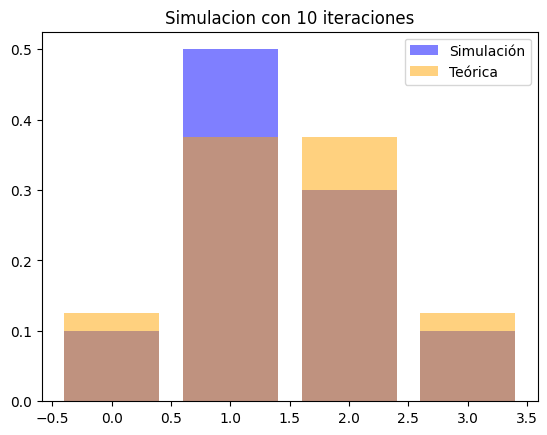

[0.12 0.4  0.4  0.08]
[np.float64(0.12499999999999999), np.float64(0.3750000000000001), np.float64(0.3750000000000001), np.float64(0.125)]


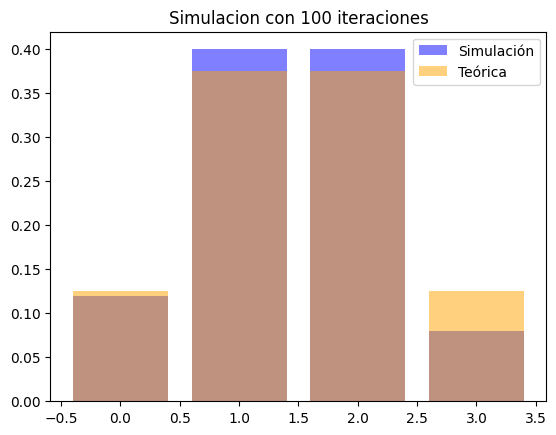

[0.112 0.387 0.36  0.141]
[np.float64(0.12499999999999999), np.float64(0.3750000000000001), np.float64(0.3750000000000001), np.float64(0.125)]


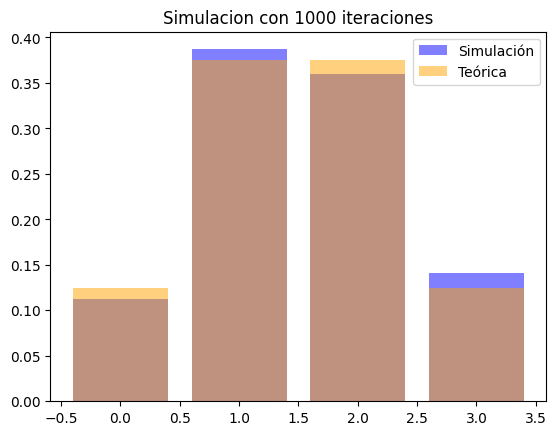

[0.1287 0.3704 0.3722 0.1287]
[np.float64(0.12499999999999999), np.float64(0.3750000000000001), np.float64(0.3750000000000001), np.float64(0.125)]


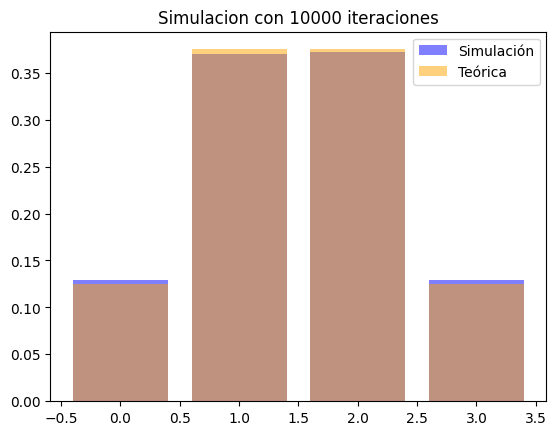

[0.12275 0.3779  0.37417 0.12518]
[np.float64(0.12499999999999999), np.float64(0.3750000000000001), np.float64(0.3750000000000001), np.float64(0.125)]


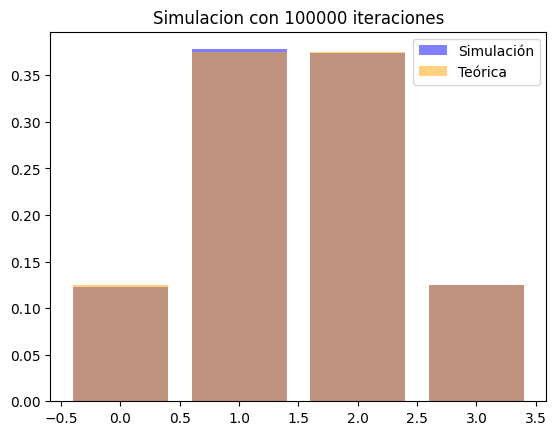

In [49]:
def simulacion(ints):
    x, y, teorica = sims(ints)
    print(y/ints)
    print(teorica)

    plt.bar(x, y/ints, label='Simulación', alpha=0.5, color='blue')
    plt.bar(x, teorica, label='Teórica', alpha=0.5, color='orange')
    plt.title(f"Simulacion con {ints} iteraciones")
    plt.legend()
    plt.show()

simulacion(10)
simulacion(100)
simulacion(1000)
simulacion(10000)
simulacion(100000)